In [10]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

# Understanding AI

Hi there! Today I'll show you how AI works! No coding or math knowledge is required! I have lerned this from the [fast.ai](https:fast.ai) course Deep Learning for coders lessons one and two, I encourage you to try them to if you know how to code or will learn how to code.

## A (very) brief history and introduction
The most common AI is machine learning, or a neural network. It's modeled after a real neuron, like this:
<img width=300 src="images/neuron.png" alt="Mark 1 perceptron"></img>
> Credit: https://www.quora.com/What-is-the-differences-between-artificial-neural-network-computer-science-and-biological-neural-network



In 1943 Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, developed the model of the artificial neuron. The Mark 1 perceptron was the first device to use the artificial neuron, and it was not made by McCulloch or Pitts but by Frank Rosenblatt, who build on the work of McCulloch and Pitts and gave the artificial neuron the ability to learn. Here is Rosenblatt's device, the Mark 1 Perceptron:

<img width=200 src="https://i.redd.it/bo3xoa8y4m341.jpg" alt="Mark 1 perceptron"></img>
> Credit: https://i.redd.it/bo3xoa8y4m341.jpg

So, if AI started in over 70 years ago, should it be more advanced today? Probably, but a book called *Perceptrons* detailed the perceptron, and showed that the device couldn't solve basic but critical math problems. The book also showed that multiple layers of these devices could solve the problems. In fact, the *universal approximation theorum* shows that a neural network with multiple layers can solve any problem with any accuracy, in theory. However, instead of building with multiple layers, scientists largely ignored neural networks for decades.

Eventually, in the 1980's, neural networks were built with two layers, and were used to solve real, practical problems. But although two layers were theoretically enough, in reality more layers were needed to make the best models. Neural networks have only been being built with many layers in the past decade. I'll show you what I mean by layers soon, but first...

## Make a Model!

Often, it's better to learn from the top-down - doing something first, and *then* explaining it. I encourage you to make a model now with https://teachablemachine.withgoogle.com or a similar software. Simply click on "Get Started" and then on image project and follow the directions. Then, I'll explain how it works.

> Note: Teachable Machine requires no software download or sign-up!

> Note: If you are following the fast.ai course for coders, there is a simple model in the "intro" notebook

## So how does it work?

Let's go back to the artificial neuron before:
<img width=300 src="images/neuron.png" alt="Artificial Neuron Model"></img>
> Credit: https://www.quora.com/What-is-the-differences-between-artificial-neural-network-computer-science-and-biological-neural-network

It has input and output. Actually, it has multiple inputs, and multiple possible outputs, and a function in the middle. But this simpler diagram might make more sense:

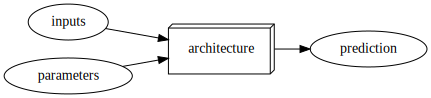

In [17]:
#hide_input
gv('''architecture[shape=box3d width=1 height=0.7]
inputs->architecture->prediction; parameters->architecture''')

**Inputs** and **Parameters** go into the **architecture**, which generates a **prediction**. 
For a quick comparison, here is a normal computer program:

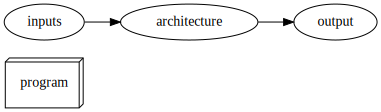

In [18]:
#hide_input
gv('''program[shape=box3d width=1 height=0.7]
inputs->architecture->output''')

See the difference? The neural networks have parameters, not just inputs. It might seem like a small change, but it is very powerful. Think of the parameters as what it has learned from running the program last time - it gets a bit smarter each time and saves that knowledge for when it runs the next time. 

Maybe you think that a "real" neural network can't be this simple. The full diagram is a bit more complicated.

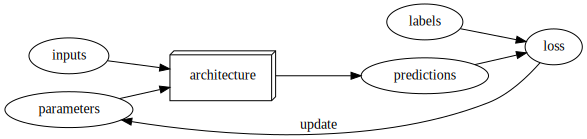

In [19]:
#hide_input
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

The additional parts of the diagram are **labels**, **loss**, and **update**. These parts show how the model gets smarter each time, or how it gets it's parameters. The **labels** are the answer key. They tell the model if it is right or wrong. If I am training a model to catagorize cats and dogs, the inputs would be images and the labels would be either "cat" or "dog." The **loss** is calculated by a function. In my cat and dog images, the loss would tell the computer not just that it was right or wrong, but how right or how wrong so it can have more accurate updates. The **update** updates the **parameters** depending on how right or wrong its **prediction** was. **When the update happens, it has now learned.**

I won't go into detail about what the parameters actually are - I don't completely know - but just know that they are values that are adjusted until the neural network gets as accurate as it can. So, the longer we train it, the better it gets, right?
Yes and No. Say I have 100 cat photos and 100 dog photos, and I train my neural network with them many, many times. Yes, it will get better at those 100 cat photos and 100 dog photos, but it will get too used to them and will have a harder time on images it has never seen before. It will still work, but it will be more confused when it sees new images. This is called **overfitting**. Here is a picture that might help you understand:
<img width=500 src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" alt="Mark 1 perceptron"></img>
> Credit: https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png

The image shows that when it overfits, it doesn't have a generalized line but instead has a line that has fitted to the exact data it was trained on. Make sure it doesn't overfit, some data in any dataset must be reserved for validation set. The validation set must stay seperate and is not used for training the model. 

Congratulations! You now know a lot more about machine learning than most people. But we still haven't gotten to talk about layers, which, as I mentioned earlier, were key to using machine learning for more challenging problems. Read the second section to learn more, still without any code or math.


## Digging Deeper

In this section, we'll talk about deep learning and layers. Actually, deep learning just means that there are multiple layers. And, as I said earlier, a lack of layers held back the field of AI for many decades. But what exactly are layers? I'm going to show you the layers of an image network similar to the one you trained with teachable machine:

<img width=900 src="cnn.png" alt="CNN Layers"></img>
> Credit: KindPNG

See how it starts in layer 1 recognizing super-simple patterns, then starts to recognize more detailed parts of images. In layer 5 it is a recognizable picture, although not the full picture. There are still a few more layers not shown in the image, they are the top layers. 

When you trained your Teachable Machine model, you weren't actually training it from scratch. You were training from a pre-trained model like the one in the picture, and then updating those top layers not seen in the image so that they did what you want them to do. You can see that the first layers of the model are identifying common patterns. Instead of making the model learn common patterns all over when we use Teachable Machine, it uses pre-trained early layers. This is called **transfer learning**. Transfer learning is very useful and requires less data.

There is a huge database called ImageNet, and powerful neural networks trained off of ImageNet are great for transfer learning. This is so powerful that researchers will convert non-image data to images. For example, Ethan Sutin converted sound to images and beat the state of the art on an urban sounds dataset.

<img width=500 src="sound.png" alt="Pictures of Sounds"></img>
> Credit: https://etown.medium.com/great-results-on-audio-classification-with-fastai-library-ccaf906c5f52

Thank you for reading, and congratulations! You now know a lot more about A.I. and deep learning, and it's super important that more people learn about this as it becomes a bigger part of our lives. Be sure to share this knowledge! 
I will try to keep this updated and make it a great guide. Again, thank you!